<div class="alert alert-block" style = "background-color: black">
    <p><b><font size="+4" color="orange">Data Cleaning & Preparation in Pandas</font></b></p>
    <p><b><font size="+1" color="white">by Jubril Davies</font></b></p>
    </div>

In [77]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams.update({'font.size':14}) #sets global font size

$$\begin{align} \text{This work focuses on filtering, cleaning and transforming data} \end{align}$$
---
<div class= "alert alert-block" style="background-color: orange; border-color: black">
    <p><b><font size="+2" color="black">Removing Duplicates</font></b></p>
    </div>
    
---

A messy dataset may contain duplicate rows for many reasons. This may be valid duplicates or invalid depending on the context of the domain problem. In invalid cases, the DataFrame methods `duplicated` and `drop_duplicates` offer an excellent way of handling such situations.

> #### **Given the DataSet**

In [2]:
data = pd.DataFrame({'Name':['Adam','Bale','Chris','Dave','Edward','Adam','Bale','Adam'],
                    'Age':[25,30,35,40,45,25,30,28], 'Dept':['HR','IT','Sales','IT','Supply','HR','IT','HR'],
                    'Salary':[50000,60000,70000,80000,90000,50000,60000,52000]})
data

,Name,Age,Dept,Salary
0,Adam,25,HR,50000
1,Bale,30,IT,60000
2,Chris,35,Sales,70000
3,Dave,40,IT,80000
4,Edward,45,Supply,90000
5,Adam,25,HR,50000
6,Bale,30,IT,60000
7,Adam,28,HR,52000


In [3]:
data_no_duplicates = data.drop_duplicates()
data_no_duplicates

,Name,Age,Dept,Salary
0,Adam,25,HR,50000
1,Bale,30,IT,60000
2,Chris,35,Sales,70000
3,Dave,40,IT,80000
4,Edward,45,Supply,90000
7,Adam,28,HR,52000


In [4]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
6     True
7    False
dtype: bool

> #### **Remove duplicates based on Specific Columns**
Remove duplicates based only on the Name and Department columns, keeping the first occurrence

In [5]:
data_no_duplicates_specific = data.drop_duplicates(subset=['Name','Dept'])

data_no_duplicates_specific

,Name,Age,Dept,Salary
0,Adam,25,HR,50000
1,Bale,30,IT,60000
2,Chris,35,Sales,70000
3,Dave,40,IT,80000
4,Edward,45,Supply,90000


> #### **Passing the `keep=last` will return only the last one**

In [6]:
data_no_duplicates_keep_last = data.drop_duplicates(['Name','Dept'],keep='last')

data_no_duplicates_keep_last

,Name,Age,Dept,Salary
2,Chris,35,Sales,70000
3,Dave,40,IT,80000
4,Edward,45,Supply,90000
6,Bale,30,IT,60000
7,Adam,28,HR,52000


> #### **After removing duplicates, it might be necessary to reset index for a cleaner dataframe**

In [7]:
data_reset_index = data.drop_duplicates().reset_index(drop=True)

data_reset_index

,Name,Age,Dept,Salary
0,Adam,25,HR,50000
1,Bale,30,IT,60000
2,Chris,35,Sales,70000
3,Dave,40,IT,80000
4,Edward,45,Supply,90000
5,Adam,28,HR,52000


<div class= "alert alert-block" style="background-color: orange; border-color: black">
    <p><b><font size="+2" color="black">Transforming Data using a Function or Mapping</font></b></p>
    </div>

---

In some instances, it might be necessary to transform data based on values in an array, series or dataframe. This can be achieved using a function or Pandas map function in the case of a dataframe.

<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">1. Transforming Data in an Array</font></b></p>
    </div>

> #### **Given an array of temperatures**

In [8]:
celsius_temp = np.array([0,20,30,40,100])
celsius_temp

array([  0,  20,  30,  40, 100])

**Define a transformation function to convert celsius to fahrenheit**

In [9]:
def celsius_to_fahrenheit(celsius):
    return celsius * 9/5 + 32

# Apply the function to the array
vectorized_func = np.vectorize(celsius_to_fahrenheit)
fahrenheit_temp = vectorized_func(celsius_temp)
temp = pd.DataFrame({'celsius_temp':celsius_temp,'fahrenheit_temp':fahrenheit_temp})
temp

,celsius_temp,fahrenheit_temp
0,0,32.0
1,20,68.0
2,30,86.0
3,40,104.0
4,100,212.0


<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">2. Transforming Data in a Series</font></b></p>
    </div>

> #### **Given a series of dates with the goal of applying transformations to extract weekdays and weekends**

In [10]:
dates = pd.Series(['2024-01-01','2024-01-02','2024-01-03','2024-01-04','2024-01-05','2024-01-06','2024-01-07'])
dates

0    2024-01-01
1    2024-01-02
2    2024-01-03
3    2024-01-04
4    2024-01-05
5    2024-01-06
6    2024-01-07
dtype: object

**Convert the strings to datetime objects**

In [11]:
dates = pd.to_datetime(dates)
dates

0   2024-01-01
1   2024-01-02
2   2024-01-03
3   2024-01-04
4   2024-01-05
5   2024-01-06
6   2024-01-07
dtype: datetime64[ns]

**Define a function to get the day of the week**

In [12]:
def get_day_week(dates):
    return dates.day_name()

#Apply the function to the weekdays
weekdays = dates.map(get_day_week)
weekdays

0       Monday
1      Tuesday
2    Wednesday
3     Thursday
4       Friday
5     Saturday
6       Sunday
dtype: object

**Define a new function to check whether each date is a weekend**

In [13]:
def is_weekend(date):
    return date.weekday() >= 5

#Apply the function to weekends
weekends = weekdays[dates.map(is_weekend)]
weekends

5    Saturday
6      Sunday
dtype: object

<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">3. Transforming Data in a DataFrame</font></b></p>
    </div>

> #### **Given a dataset of housing prices with the goal of normalizing housing prices**

In [14]:
housing = pd.DataFrame({'Location':['New York','San Francisco','Los Angeles','Chicago','Houston'],
                       'Price':[1250000,1450000,1650000,800000,650000]})
housing

,Location,Price
0,New York,1250000
1,San Francisco,1450000
2,Los Angeles,1650000
3,Chicago,800000
4,Houston,650000


**Define a transformation function to normalize the prices**

In [15]:
def normalize_price(price,mean_price,std_price):
    return(price - mean_price)/std_price

#Calculate mean and std of prices
mean_price = housing['Price'].mean()
std_price = housing['Price'].std()

#Apply the function to the housing prices
housing['Normalized_Prices'] = housing['Price'].map(lambda x: normalize_price(x,mean_price, std_price))
housing

,Location,Price,Normalized_Prices
0,New York,1250000,0.211838
1,San Francisco,1450000,0.682589
2,Los Angeles,1650000,1.153340
3,Chicago,800000,-0.847352
4,Houston,650000,-1.200415


<div class= "alert alert-block" style="background-color: orange; border-color: black">
    <p><b><font size="+2" color="black">Replacing Values</font></b></p>
    </div>

---

There are a couple of ways to fill in missing data using Pandas:

* `fillna` method is a special case of general value replacement
* `map` is used to modify a subset of values
* `replace` provides a simpler and more flexible way to modify a subset of values

> #### **Given the dataset**

In [16]:
dt = pd.Series([100, 120, -999, -1000, 350])
dt

0     100
1     120
2    -999
3   -1000
4     350
dtype: int64

In [17]:
dt.replace([-999,-1000],np.nan)

0    100.0
1    120.0
2      NaN
3      NaN
4    350.0
dtype: float64

**To use a different replacement value for each value, pass a list of substitutes**

In [18]:
dt.replace([-999,-1000],[np.nan,0])

0    100.0
1    120.0
2      NaN
3      0.0
4    350.0
dtype: float64

**A dictionary of values and replacements can also be passed as arguments**

In [19]:
dt.replace({-999:np.nan,-1000:0})

0    100.0
1    120.0
2      NaN
3      0.0
4    350.0
dtype: float64

<div class= "alert alert-block" style="background-color: orange; border-color: black">
    <p><b><font size="+2" color="black">Renaming Axis Indexes</font></b></p>
    </div>

---

An axis label is either a column name, a row name or an index name. This can be modified in place without creating a new data structure.

> #### **Given the DataFrame**

In [20]:
dm = pd.DataFrame(np.linspace(25000,300000,12).reshape((3,4)),index=['Lagos','Maryland','Ikoyi'],
                  columns=['one','two','three','four'])
dm

,one,two,three,four
Lagos,25000.0,50000.0,75000.0,100000.0
Maryland,125000.0,150000.0,175000.0,200000.0
Ikoyi,225000.0,250000.0,275000.0,300000.0


> #### **The index has a map method which can be used to modify its labels**
Modify the dataframe in place

In [21]:
dm.index = dm.index.map(str.upper)
dm

,one,two,three,four
LAGOS,25000.0,50000.0,75000.0,100000.0
MARYLAND,125000.0,150000.0,175000.0,200000.0
IKOYI,225000.0,250000.0,275000.0,300000.0


> #### **Creating a transformed version rather than modifying the original dataframe**
#### Use rename: It returns a reference to the original dataframe

In [22]:
dm.rename(index=str.title,columns=str.upper)

,ONE,TWO,THREE,FOUR
Lagos,25000.0,50000.0,75000.0,100000.0
Maryland,125000.0,150000.0,175000.0,200000.0
Ikoyi,225000.0,250000.0,275000.0,300000.0


#### rename can be used with a dictionary like reference to specify changes

In [23]:
dm.rename(index={'LAGOS': 'INDIANA'},columns={'three':'THIRD'})

,one,two,THIRD,four
INDIANA,25000.0,50000.0,75000.0,100000.0
MARYLAND,125000.0,150000.0,175000.0,200000.0
IKOYI,225000.0,250000.0,275000.0,300000.0


<div class= "alert alert-block" style="background-color: orange; border-color: black">
    <p><b><font size="+2" color="black">Discretizing & Binning</font></b></p>
    </div>

---

At times, it is important to categorize continous variables into bins for statistical analysis

> #### **Using `cut` method in Pandas to bin variables**

In [24]:
scores = [21,23,24,56,37,31,42,67,82,52]
grades = pd.DataFrame(scores,columns=['scores'])

**Lets divide this into bin intervals using a cut function in Pandas**

In [25]:
bins = [20,40,60,80,100]
binned_grades = pd.cut(grades['scores'],bins)

#Assess how many elements are within each interval
pd.value_counts(binned_grades)

(20, 40]     5
(40, 60]     3
(60, 80]     1
(80, 100]    1
Name: scores, dtype: int64

**(  ]** - This means that the parenthesis side is open while the square brackets side is closed. The open side can be changed by passing the right=False argument in the cut function. 

In [26]:
binned_grades = pd.cut(grades['scores'],bins,right=False)
pd.value_counts(binned_grades)

[20, 40)     5
[40, 60)     3
[60, 80)     1
[80, 100)    1
Name: scores, dtype: int64

#### **It is possible to specify bin names as labels in the cut function**

In [27]:
class_groups = ['Crimson', 'Jade','Silver','Gold']
binned_grades = pd.cut(grades['scores'],bins,labels=class_groups)
binned_grades

0    Crimson
1    Crimson
2    Crimson
3       Jade
4    Crimson
5    Crimson
6       Jade
7     Silver
8       Gold
9       Jade
Name: scores, dtype: category
Categories (4, object): ['Crimson' < 'Jade' < 'Silver' < 'Gold']

In [28]:
scores_n_grades=pd.DataFrame({'scores':scores,'grades':binned_grades})
scores_n_grades

,scores,grades
0,21,Crimson
1,23,Crimson
2,24,Crimson
3,56,Jade
4,37,Crimson
5,31,Crimson
6,42,Jade
7,67,Silver
8,82,Gold
9,52,Jade


>#### **For uniformly distributed data, an integer can be passed into the cut function to obtain equal bin intervals**

In [29]:
data = np.random.rand(25)
binned_data = pd.cut(data,5, precision=2)
pd.value_counts(binned_data)

(0.78, 0.98]     11
(0.21, 0.4]       4
(0.4, 0.59]       4
(0.012, 0.21]     3
(0.59, 0.78]      3
dtype: int64

#### **Using `qcut` to bin data into sample quantiles**

This was born out of the need to evenly distribute  the data in the bins. Since `qcut` uses sample qauntiles by definition it is possible to obtain equal size bins

> #### **Given a normally distributed data**

In [30]:
dn = pd.DataFrame({'bell_data': np.random.randn(1000)}) 
qcut_dn = pd.cut(dn['bell_data'],4,labels=['Q1','Q2','Q3','Q4']) # cut into quartiles
pd.value_counts(qcut_dn)

Q2    598
Q3    339
Q1     57
Q4      6
Name: bell_data, dtype: int64

<div class= "alert alert-block" style="background-color: orange; border-color: black">
    <p><b><font size="+2" color="black">Detecting & Filtering Outliers</font></b></p>
    </div>

---

Detecting and Filtering outliers is a critical step in data cleaning and transformation. We shall consider three methods of handling outliers using Pandas, Numpy and Visualization tools:

* Z-score method for univariate data
* IQR method for univariate skewed distributions
* Isolation Forest for high-dimensional data
* Local Outlier Factor for datasets of varying density
* Mahalanobis Distance for multivariate outlier detection

<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">1. Detecting Outliers using the z-score method</font></b></p>
    </div>

> #### **Given the student age dataset**

,name,age,zscore,outlier
11,Hans,100,3.313692,3.313692


<Figure size 576x360 with 0 Axes>

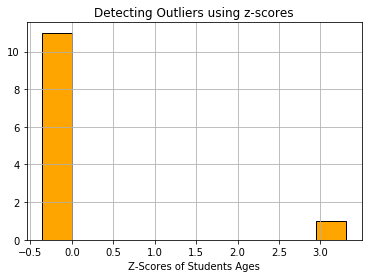

In [31]:
students = pd.DataFrame({'name':['Frank','Abel','Cane','David','Esau','Chris','Phillip','Greg','Fisher','Renee','Tristan','Hans'],
                       'age':[10,12,12,13,12,11,12,11,13,10,10,100]})

#Calculate z-score
from scipy.stats import zscore
students['zscore'] = zscore(students['age'])
students['outlier'] = students['zscore']

#Visualize Outliers
plt.figure(figsize=(8,5));
students.hist('outlier',edgecolor='black',color='orange');
plt.xlabel('Z-Scores of Students Ages');
plt.title('Detecting Outliers using z-scores');

#Identify Outliers
students[students['outlier'].abs()>3]

<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">2. Detecting Outliers using the Inter-Quartile Range method</font></b></p>
    </div>

> #### **Given a dataset with a column of normal and outlier values**

In [32]:
data1 = np.random.normal(loc=50, scale=10, size=1000) #Normal distribution
data1 = np.append(data1,[150,200,300]) #Adding Outliers
data1 = pd.DataFrame({'data':data1})
data1.head()

,data
0,67.414639
1,40.111401
2,60.450633
3,51.314226
4,38.022673


**Calculate IQR and identify Outliers**

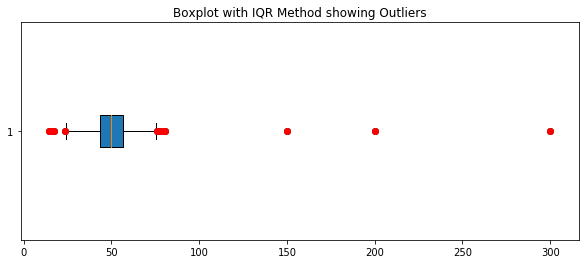

,data,outlier
27,77.896332,True
120,80.147796,True
188,75.965899,True
320,17.604147,True
364,23.561704,True
436,15.661243,True
506,14.446167,True
860,80.770579,True
1000,150.000000,True
1001,200.000000,True


In [33]:
Q1 = data1['data'].quantile(0.25)
Q3 = data1['data'].quantile(0.75)
IQR = Q3 - Q1

#Identify Outliers
data1['outlier'] = (data1['data'] < (Q1 - 1.5*IQR)) | (data1['data'] > (Q3 + 1.5* IQR))

#Display Outliers
outliers = data1[data1['outlier']]

#Visualize Outliers
plt.figure(figsize=(10,4))
plt.boxplot(data1['data'],vert=False,patch_artist=True)
plt.scatter(outliers['data'],np.ones(len(outliers)),color='red',zorder=3)
plt.title('Boxplot with IQR Method showing Outliers');
plt.show()

outliers

<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">3. Detecting Outliers using Isolation Forest method</font></b></p>
    <p><b><font size="+1" color="white">For high-dimensional data</font></b></p>
    </div>

> #### **Given a high-dimensional dataset with a column of normal and outlier values**

In [34]:
#Generate high-dimensional data
np.random.seed(40)
hdata = np.random.randn(1000,5) #Normal distribution
hdata[:50] += np.random.uniform(10,20, size=(50,5)) #Adding Outliers
columns = [f'feature_{i}' for i in range(1,6)] #Label columns
hdata_df = pd.DataFrame(hdata,columns=columns) #create the dataframe

from sklearn.ensemble import IsolationForest
#Fit the Model
iso_forest = IsolationForest(contamination=0.05, random_state=42)

#Predict the outliers
hdata_df['outlier'] = iso_forest.fit_predict(hdata_df)

hdata_df['outlier'] = hdata_df['outlier'] == -1
num_outliers = hdata_df['outlier'].sum()
hdata_df.head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5,outlier
0,10.066169,15.562446,13.316041,19.710294,15.543549,True
1,18.580897,20.842810,19.627943,11.968192,18.555324,True
2,13.128506,19.453426,18.730020,17.195754,11.891071,True
3,11.596662,10.372573,13.817410,16.813016,17.489866,True
4,15.564599,12.303034,17.855777,17.287169,11.204100,True
5,17.003881,14.818243,12.976683,16.465543,13.852850,True
6,11.419861,14.897461,15.021424,16.385946,11.922737,True
7,12.994568,14.906894,12.700972,16.357953,16.912696,True
8,20.829643,15.124330,15.367783,11.744270,15.313717,True
9,20.170012,19.431205,11.336032,14.836332,20.261532,True


**Displayed number of outliers matches the number added**

In [35]:
num_outliers

50

> #### **Visualize Results using pairplot with Outliers highlighted**

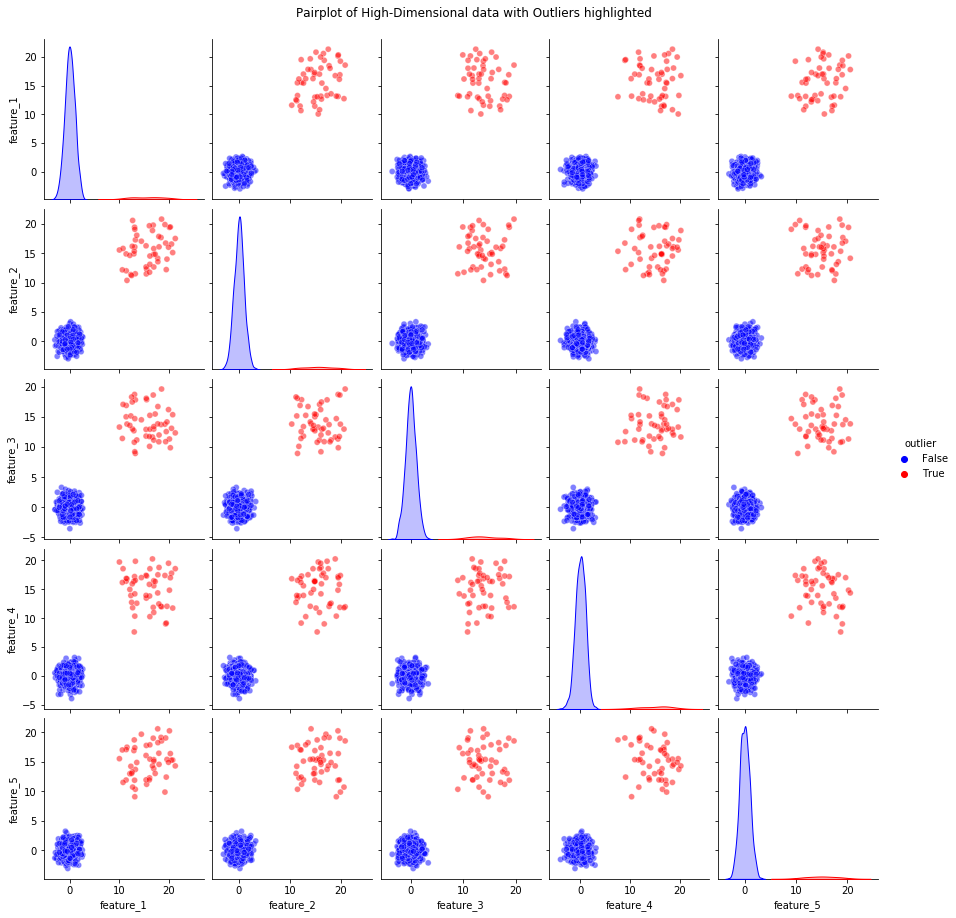

In [36]:
sb.pairplot(hdata_df, hue='outlier', palette={False: 'blue', True: 'red'}, plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of High-Dimensional data with Outliers highlighted',y=1.02)
plt.show()

<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">4. Detecting Outliers using the Local Outlier Factor Method</font></b></p>
    </div>

> #### **Given a dataset with a column of normal and outlier values**

In [37]:
dl = np.random.normal(loc=50, scale=10, size=1000) #Normal distribution
dl = np.append(dl,[150,200,300]) #Adding Outliers
dl_df = pd.DataFrame(dl,columns=['value'])
dl_df.head()

,value
0,49.203898
1,37.411747
2,44.196092
3,53.626521
4,50.377137


In [38]:
from sklearn.neighbors import LocalOutlierFactor

#Fit the Model
lof = LocalOutlierFactor(n_neighbors=20,contamination=0.01)
dl_df['outlier'] = lof.fit_predict(dl_df[['value']])

#Display Outliers
outliers = dl_df[dl_df['outlier'] == -1]
outliers

,value,outlier
139,77.693846,-1
388,81.442653,-1
572,25.584157,-1
583,26.849220,-1
643,22.949441,-1
652,26.389186,-1
655,20.680177,-1
889,24.401845,-1
1000,150.000000,-1
1001,200.000000,-1


**Filter out the Outliers**

In [39]:
dl_df_cleaned = dl_df[dl_df['outlier'] != -1]
dl_df_cleaned = dl_df_cleaned.drop(columns=['outlier'])
dl_df_cleaned.head(10)

,value
0,49.203898
1,37.411747
2,44.196092
3,53.626521
4,50.377137
5,47.622981
6,51.560389
7,53.280325
8,35.648504
9,51.821263


<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">5. Detecting Outliers using Mahalanobis Distance Method</font></b></p>
    </div>

Mahalanobis Distance is used for multivariate data. It is a measure of the distance between a point and a distribution taking into account the correlations between variables. This makes it particularly useful in identifying outliers, anomaly detection and in classification and clustering in machine learning.

> #### **Given a dataset with a column of normal and outlier values**

In [40]:
dta = np.random.multivariate_normal([50,50],[[10,2],[2,10]],size=1000)
outliers = np.array([[150,150],[200,200],[300,300]])
dta = np.vstack([dta,outliers])
dta_df = pd.DataFrame(dta,columns=['feature1','feature2'])
dta_df.head()

,feature1,feature2
0,44.704682,49.157189
1,49.520326,55.420985
2,49.807394,52.578759
3,49.650951,46.233326
4,52.155670,55.188582


In [41]:
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2

# Calculate Mahalanobis Distance
cov_matrix = np.cov(dta_df,rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean_distr = dta_df.mean(axis=0).values
dta_df['mahalanobis'] = dta_df.apply(lambda x: mahalanobis(x, mean_distr,inv_cov_matrix), axis=1)

#Identify Outliers using chi-squared distribution with 2 degrees of freedom
dta_df['outlier'] = dta_df['mahalanobis'] > chi2.ppf((1 - 0.01), df=2)

#Display Outliers
outliers = dta_df[dta_df['outlier']]
outliers

,feature1,feature2,mahalanobis,outlier
1000,150.0,150.0,9.924022,True
1001,200.0,200.0,14.910166,True
1002,300.0,300.0,24.882454,True


**Filter out the Outliers**

In [42]:
#Remove Outliers
dta_df_cleaned = dta_df[~dta_df['outlier']]

#Drop helper columns
dta_df_cleaned = dta_df_cleaned.drop(columns=['mahalanobis','outlier'])
dta_df_cleaned.head(10)

,feature1,feature2
0,44.704682,49.157189
1,49.520326,55.420985
2,49.807394,52.578759
3,49.650951,46.233326
4,52.155670,55.188582
5,48.026657,43.747054
6,50.153609,52.899727
7,50.532120,51.619328
8,51.739169,54.523957
9,52.569952,47.417724


<div class= "alert alert-block" style="background-color: orange; border-color: black">
    <p><b><font size="+2" color="black">Permutation & Random Sampling</font></b></p>
    </div>

---
Permutation and Random Sampling are two pwerful techniques in data transformation and analysis. They are used for various purposes, including:

* statistical testing, 
* data augmentation and 
* bootstrapping. 

These techniques are essential in data science for validating models, increasing data variability and estimating the distribution of statistics.

<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">1. Permutation - Data Augmentation</font></b></p>
    </div>

Permutation can be used to create new samples from existing datasets to increase the dataset size and variability. This is especially useful in machine learning and deep learning.

> #### **Given an array of values**

In [43]:
data = np.array([10,20,30,40])
data

array([10, 20, 30, 40])

> #### **Generate augmented data through rearranging and reordering of original data**

In [44]:
augmented_data = [np.random.permutation(data) for t in range(5)]
augmented_data

[array([10, 30, 40, 20]),
 array([10, 30, 20, 40]),
 array([40, 30, 20, 10]),
 array([40, 20, 30, 10]),
 array([40, 30, 10, 20])]

<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">2. Permutation - Statistical Testing</font></b></p>
    </div>
    
Permutation tests are used to determine if two datasets are significantly different by comparing the observed test statistic to the distribution of test statistics obtained by rearranging or reordering the labels of the data.

> #### **Given two groups of datasets, we aim to test if their means are significantly different**

In [45]:
group1 = np.random.normal(0,1,50)
group2 = np.random.normal(0.5,1,50)

#Obtain the difference in their mean values
observed_diff = np.mean(group2) - np.mean(group1) 
round(observed_diff,4)

0.8487

>#### **Combine the groups & Conduct the Permutation Test**
* In the permutation test, we repeatedly shuffle the combined data of group 1 and group2 then split into two new groups.
* We then calculate the difference in the means of the permuted groups. This will be done many times (1000)
* We build a distribution of the difference in means under null hypothesis that there is no difference between the two groups
* The p-value is calculated as the proportion of permuted differences that are as extreme or more extreme than the observed difference.

In [46]:
combined = np.concatenate([group1,group2])

num_permutations = 1000
permuted_diffs = []
for n in range(num_permutations):
    permuted = np.random.permutation(combined)
    perm_group1 = permuted[:50]
    perm_group2 = permuted[50:]
    permuted_diffs.append(np.mean(perm_group2) - np.mean(group1))

#Calculate p-value
p_value = np.sum(np.abs(permuted_diffs) >= np.abs(observed_diff))/num_permutations

results = pd.DataFrame({'observed difference': observed_diff, 'p-value': p_value},index=['stats'])
results


,observed difference,p-value
stats,0.848658,0.0


> #### **Interpretation of the p-value**

A p-value of 0.07 or close to zero indicates that none of the permuted samples had a difference in means as extreme as the observed difference. This means that under the null hypothesis (that there's no difference between the groups), it is unlikely to have a such a large difference in means of the two groups. The very small p-value indicates a strong evidence that the obsevred difference is not due to random chance.

 > **Visualize the permuted differences**

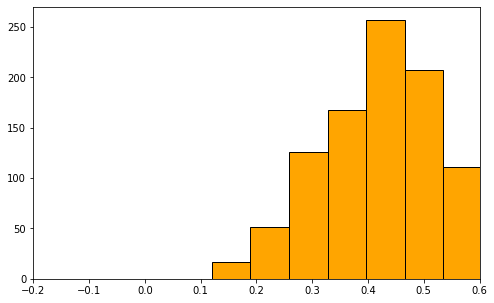

In [47]:
plt.figure(figsize=(8,5))
plt.hist(permuted_diffs,edgecolor="black",color='orange');
plt.xlim([-0.2,0.6]);

<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">3. Permutation - Bootstrapping</font></b></p>
    </div>
    
Bootstrapping with permutation involves repeatedly rearranging and reordering the dataset to estimate the distribution of a statistic

> #### **Given a dataset from a normal distribution with a mean of 0 and std of 1**
We visualize the distribution prior and after permutation to verify the distribution of the data

In [48]:
data1 = np.random.normal(0,1,1500)

# Bootstrapping
num_bootstraps = 1000
bootstrap_means = []

for i in range(num_bootstraps):
    bootstrap_sample = np.random.permutation(data1)
    bootstrap_means.append(np.mean(bootstrap_sample))
    
# Confidence Interval
conf_interval = np.percentile(bootstrap_means, [2.5,97.5])
conf_interval

array([0.02220933, 0.02220933])

This is the bootstrap 95% confidence interval for the mean

<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">1. Random Sampling - Bootstrapping</font></b></p>
    </div>
    
Random Sampling is the process of randomly selecting a subset of data from a larger dataset. It is widely used in bootstrapping, cross-validation and data-splitting for training and testing machine learning models.

#### Bootstrapping involves random sampling with replacement to estimate the distribution of a statistic. 

The aim is to demonstrate how to estimate the properties of the distribution such as mean, variance, confidence intervals of a statistical population by sampling with replacement from an existing dataset. 

Bootstrapping is particularly useful when the theoretical distribution of a statistic is complex or unknown. 

> #### **Given a dataset from a normal distribution with a mean of 0 and std of 1**



In [49]:
data2 = np.random.normal(0,1,100)

# Estimate Mean of the distribution
num_bootstraps = 1000
bootstrap_means = []
for i in range(num_bootstraps):
    bootstrap_sample = np.random.choice(data2, size=len(data2),replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))
    
# Estimate the Confidence Interval
conf_interval = np.percentile(bootstrap_means,[2.5,97.5])
conf_interval

array([-0.13612354,  0.23549449])

<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">2. Random Sampling - Data Splitting For Training & Testing</font></b></p>
    </div>
    
This is a common practice in machine learning model evaluation

In [50]:
from sklearn.model_selection import train_test_split

data3 = pd.DataFrame({'feature1': np.random.randn(100),'feature2':np.random.randn(100),
                      'target':np.random.randint(0,2,100)})

#Split the data into train and test split
train,test = train_test_split(data3, test_size=0.2,random_state=42)

train.head()

,feature1,feature2,target
55,-1.354043,-0.019204,1
88,-0.648295,-0.867904,1
26,1.495156,-0.163633,0
42,0.596439,1.721593,0
69,1.222432,1.442569,0


In [51]:
test.head()

,feature1,feature2,target
83,-0.082555,0.935362,0
53,-0.541202,0.405085,0
70,-1.005081,0.237089,0
45,-1.473532,-1.162873,0
44,-0.840660,0.658662,0


<div class= "alert alert-block" style="background-color: orange; border-color: black">
    <p><b><font size="+2" color="black">Computing Dummy Variables</font></b></p>
    </div>

---

**Another type of transformation for statistical modleing or machine learning application is converting a categorical variable into a dummy variable or indicator matrix.** 

**Also known as one-hot encoding transforming categorical variables into a series of binary variables (0 or 1) that represent the prescence or abscence  of a particular category.**

In [52]:
data4 = pd.DataFrame({'EmployeeID': [1,2,3,4,5],'Department': ['HR','Sales','Engineering','HR','Engineering'],
                      'Gender':['Male','Female','Female','Male','Male'],'Salary':[100000,50000,65000,45000,80000]})
data4

,EmployeeID,Department,Gender,Salary
0,1,HR,Male,100000
1,2,Sales,Female,50000
2,3,Engineering,Female,65000
3,4,HR,Male,45000
4,5,Engineering,Male,80000


In [53]:
# Identify the categorical columns
categorical_columns = ['Department','Gender']
dummy_data4 = pd.get_dummies(data4[categorical_columns])

#Drop the original categorical columns
data4.drop(categorical_columns,axis=1,inplace=True)

#Concatenate dummy vaiables with the original dataframe
data4 = pd.concat([data4,dummy_data4],axis=1)
data4

,EmployeeID,Salary,Department_Engineering,Department_HR,Department_Sales,Gender_Female,Gender_Male
0,1,100000,0,1,0,0,1
1,2,50000,0,0,1,1,0
2,3,65000,1,0,0,1,0
3,4,45000,0,1,0,0,1
4,5,80000,1,0,0,0,1


<div class= "alert alert-block" style="background-color: orange; border-color: black">
    <p><b><font size="+2" color="black">String Manipulation</font></b></p>
    </div>

---

String Manipulation is a fundamental skill in data science and software development. This section will cover various aspects of string manipulation using practical examples from a typical database.

> #### **Given a database of Customers**

In [54]:
dbase = pd.DataFrame({'name': ['Abel','Bale','Candy','Drake','Eva'],
                     'email': ['abel@gmail.com','bale@yahoo.com','candy@gmail.com','drake@outlook.com','eva@yahoo.com'],
                     'address':['232 Main Street','444 Elm street','747 twelfth street','887 Maple street','101 George street'],
                     'phone': ['(0804)345-9636', '(0902)888-3412','(0802)388-7818)','(0701)252-5101','(0818)766-1213']})
dbase

,name,email,address,phone
0,Abel,abel@gmail.com,232 Main Street,(0804)345-9636
1,Bale,bale@yahoo.com,444 Elm street,(0902)888-3412
2,Candy,candy@gmail.com,747 twelfth street,(0802)388-7818)
3,Drake,drake@outlook.com,887 Maple street,(0701)252-5101
4,Eva,eva@yahoo.com,101 George street,(0818)766-1213


<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">1. String Splitting</font></b></p>
    </div>

> #### **Extract the domain from the email addresses**

In [55]:
dbase['domain'] = dbase['email'].apply(lambda x: x.split('@')[1])
dbase[['email','domain']]

,email,domain
0,abel@gmail.com,gmail.com
1,bale@yahoo.com,yahoo.com
2,candy@gmail.com,gmail.com
3,drake@outlook.com,outlook.com
4,eva@yahoo.com,yahoo.com


<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">2. String Joining</font></b></p>
    </div>

> #### **Create a full address by joining street address and city**

In [56]:
city = 'New Hampshire'
dbase['full_address'] = dbase['address'] + ',' + city
dbase[['address','full_address']]

,address,full_address
0,232 Main Street,"232 Main Street,New Hampshire"
1,444 Elm street,"444 Elm street,New Hampshire"
2,747 twelfth street,"747 twelfth street,New Hampshire"
3,887 Maple street,"887 Maple street,New Hampshire"
4,101 George street,"101 George street,New Hampshire"


<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">3. String Replacement</font></b></p>
    </div>

> #### **Normalize Phone Numbers by removing special characters**

In [57]:
dbase['normalized_phone'] = dbase['phone'].str.replace('[^0-9]','',regex=True)
dbase[['phone','normalized_phone']]

,phone,normalized_phone
0,(0804)345-9636,08043459636
1,(0902)888-3412,09028883412
2,(0802)388-7818),08023887818
3,(0701)252-5101,07012525101
4,(0818)766-1213,08187661213


<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">4. String Case Conversion</font></b></p>
    </div>

> #### **Standardize names to lower case**

In [58]:
dbase['name_lower'] = dbase['name'].str.lower()
dbase[['name', 'name_lower']]

,name,name_lower
0,Abel,abel
1,Bale,bale
2,Candy,candy
3,Drake,drake
4,Eva,eva


<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">5. String Length</font></b></p>
    </div>

> #### **Calculate the length of each addresses**

In [59]:
dbase['address_length'] = dbase['address'].apply(len)
dbase[['address','address_length']]

,address,address_length
0,232 Main Street,15
1,444 Elm street,14
2,747 twelfth street,18
3,887 Maple street,16
4,101 George street,17


<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">6. Substring Extraction</font></b></p>
    </div>

> #### **Extract the first three characters of each name**

In [60]:
dbase['name_initials'] = dbase['name'].str[:1]
dbase[['name','name_initials']]

,name,name_initials
0,Abel,A
1,Bale,B
2,Candy,C
3,Drake,D
4,Eva,E


<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">7. String Contains</font></b></p>
    </div>

> #### **Check if email addresses belong to a specific domain**

In [61]:
dbase['is_gmail_domain'] = dbase['email'].str.contains('@gmail.com')
dbase[['email','is_gmail_domain']]

,email,is_gmail_domain
0,abel@gmail.com,True
1,bale@yahoo.com,False
2,candy@gmail.com,True
3,drake@outlook.com,False
4,eva@yahoo.com,False


<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">8. String Formatting</font></b></p>
    </div>

> #### **Format the phone numbers in a standard way**

In [62]:
dbase['formatted_phone'] = dbase['normalized_phone'].apply(lambda x: f'({x[:3]}) {x[3:6]}-{x[6:]}')
dbase[['normalized_phone','formatted_phone']]

,normalized_phone,formatted_phone
0,08043459636,(080) 434-59636
1,09028883412,(090) 288-83412
2,08023887818,(080) 238-87818
3,07012525101,(070) 125-25101
4,08187661213,(081) 876-61213


<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">9. Extract and Cleaning Data</font></b></p>
    </div>

> #### **Extract street number and name from the address**

In [63]:
dbase['street_number'] = dbase['address'].apply(lambda x:x.split(' ')[0])
dbase['street_name'] = dbase['address'].apply(lambda x: ' '.join(x.split(' ')[1:]))
dbase[['address','street_name']]

,address,street_name
0,232 Main Street,Main Street
1,444 Elm street,Elm street
2,747 twelfth street,twelfth street
3,887 Maple street,Maple street
4,101 George street,George street


<div class= "alert alert-block" style="background-color: orange; border-color: black">
    <p><b><font size="+2" color="black">Manipulating Categorical Data</font></b></p>
    </div>

---

This allows for better performance and memory use in Pandas operations. 

> #### **Given a column in a table containing repeated instances of a smaller set of distinct values.**

In [64]:
values = pd.Series(['apple', 'orange', 'apple','apple'] * 2)
values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

**Retrieve the unique values**

In [65]:
pd.unique(values)

array(['apple', 'orange'], dtype=object)

In [66]:
pd.value_counts(values)

apple     6
orange    2
dtype: int64

> #### **In data warehousing, categorical data are encoded using a dictionary-encoded representation using a value and dimension table**

In [67]:
values = pd.Series([0, 1, 0, 0] * 2)
values

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
dtype: int64

In [68]:
dims = pd.Series(['apple','orange'])
dims

0     apple
1    orange
dtype: object

**Using the take method restores the values and returns the values as the index**

In [69]:
dims.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">Categorical Extension Type in Pandas</font></b></p>
    </div>

Pandas has a special categorical extension type that is used for holding data that uses integer-based encoding. This is useful in data holding many occurences of similar values and can be used as a compression technique that can provide faster performance with lower memory consumption.

> #### **Given a dataframe of string of values**

In [70]:
fruits = ['kiwi', 'cherry','kiwi','kiwi','cherry'] * 2
N = len(fruits)
rng = np.random.default_rng(seed=12345)
dframe = pd.DataFrame({'fruits':fruits,'basket_id':np.arange(N),
                       'count':rng.integers(3,15,size= N),'weight':rng.uniform(0,4,size=N)},
                       columns= ['basket_id','fruits','count','weight'])
dframe

,basket_id,fruits,count,weight
0,0,kiwi,11,1.331256
1,1,cherry,5,2.393235
2,2,kiwi,12,0.746937
3,3,kiwi,6,2.691024
4,4,cherry,5,3.767211
5,5,kiwi,12,0.992983
6,6,cherry,10,3.795525
7,7,kiwi,11,2.668950
8,8,kiwi,14,0.383592
9,9,cherry,7,1.767359


> #### **Convert Fruits column to category type**

In [71]:
fruits_cat = dframe['fruits'].astype('category')
#The elements of the fruits category can now be accessed using the array method
c = fruits_cat.array
c[0:3]

['kiwi', 'cherry', 'kiwi']
Categories (2, object): ['cherry', 'kiwi']

> #### **c is now a categorical object with attributes categories and codes**

In [72]:
c.categories,c.codes

(Index(['cherry', 'kiwi'], dtype='object'),
 array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0], dtype=int8))

In [73]:
dict(enumerate(c.categories))

{0: 'cherry', 1: 'kiwi'}

**If you have obtained categorical encoded data from another source, you can use the alternative `from_codes` constructor**

In [74]:
categories = ['cash','food', 'bash', 'base']
codes = [0,1,2,0,2,1]
#get out the categories from these 2: codes and categories
my_category = pd.Categorical.from_codes(codes,categories)
my_category

['cash', 'food', 'bash', 'cash', 'bash', 'food']
Categories (4, object): ['cash', 'food', 'bash', 'base']

**These categories are not automatically ordered unless explicitly specified.**

In [75]:
ordered_my_category = pd.Categorical.from_codes(codes,categories,ordered=True)
ordered_my_category

['cash', 'food', 'bash', 'cash', 'bash', 'food']
Categories (4, object): ['cash' < 'food' < 'bash' < 'base']

**with no ordering, the option `as_ordered` can be used**

In [76]:
my_category.as_ordered()

['cash', 'food', 'bash', 'cash', 'bash', 'food']
Categories (4, object): ['cash' < 'food' < 'bash' < 'base']